<a href="https://colab.research.google.com/github/DammuNikhitha/AI-ML-Internship-Task-13/blob/main/01_TASK13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 13: PCA – Dimensionality Reduction**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Step 1: Load Digits Dataset and Flatten Images

The digits dataset contains 8x8 pixel images of handwritten digits.
Each image is flattened into a feature vector of length 64.


In [2]:
digits = load_digits()

X = digits.data   # already flattened (64 features)
y = digits.target

print("Dataset shape:", X.shape)
print("Labels shape:", y.shape)

Dataset shape: (1797, 64)
Labels shape: (1797,)


## Step 2: Standardize the Features

Scaling is required for PCA to work correctly because PCA is sensitive to feature variance.

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 3: Apply PCA with Different Number of Components

We will test PCA with 2, 10, 30, and 50 components and track explained variance.

In [4]:
components = [2, 10, 30, 50]
explained_variances = []

for n in components:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

explained_variances

[np.float64(0.21594970500832789),
 np.float64(0.5887375533730296),
 np.float64(0.8932084382449569),
 np.float64(0.982759194602153)]

In [5]:
components = [2, 10, 30, 50]
explained_variances = []

for n in components:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

explained_variances

[np.float64(0.21594970500832789),
 np.float64(0.5887375533730296),
 np.float64(0.8932084382449569),
 np.float64(0.982759194602153)]

## Step 4: Plot Cumulative Explained Variance

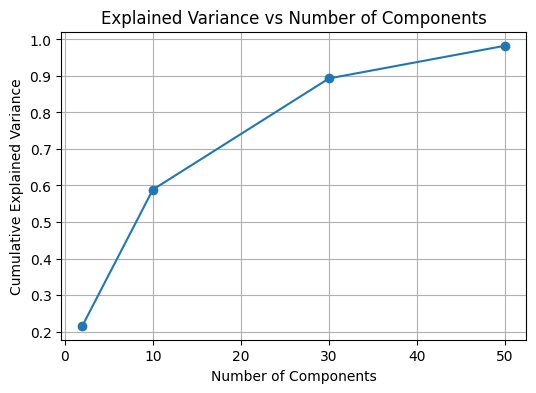

In [6]:
plt.figure(figsize=(6,4))
plt.plot(components, explained_variances, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.grid(True)
plt.show()

## Step 5: Train Logistic Regression on Original Dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_original = LogisticRegression(max_iter=5000)
model_original.fit(X_train, y_train)

y_pred_original = model_original.predict(X_test)
original_accuracy = accuracy_score(y_test, y_pred_original)

original_accuracy

0.9722222222222222

## Step 6: Train Logistic Regression on Reduced Dataset (PCA = 30 components)

In [8]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

model_pca = LogisticRegression(max_iter=5000)
model_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = model_pca.predict(X_test_pca)
pca_accuracy = accuracy_score(y_test_pca, y_pred_pca)

pca_accuracy

0.9611111111111111

## Step 7: Accuracy Comparison Report

We compare the accuracy of Logistic Regression on:
- Original dataset (64 features)
- Reduced dataset (30 PCA components)

In [9]:
print("Accuracy on Original Dataset:", original_accuracy)
print("Accuracy on PCA Reduced Dataset:", pca_accuracy)

Accuracy on Original Dataset: 0.9722222222222222
Accuracy on PCA Reduced Dataset: 0.9611111111111111


## Step 8: Visualize Data in 2D using PCA

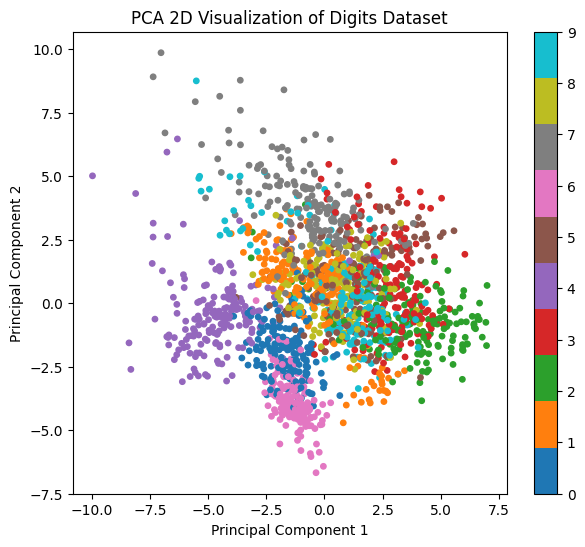

In [10]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=y, cmap='tab10', s=15)
plt.colorbar(scatter)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA 2D Visualization of Digits Dataset")
plt.show()